In [9]:
import numpy as np
import math
import library2 as lb
import matplotlib.pyplot as plt
from tqdm import tqdm

# Ques 1:

In [2]:
# Define the matrix A
A = np.loadtxt('matrices1.txt', max_rows=6)

# Read the vector B from the file
b = np.loadtxt('matrices1.txt', skiprows=6)

# Check if the matrix is symmetric
if lb.symmetric(A):
    print("Matrix is symmetric")
else:
    print("Matrix is not symmetric")

# Solve using Cholesky decomposition
x_cho = lb.cholesky_solver(A, b)
print("Solution using Cholesky decomposition:", x_cho)

# Gauss-Seidel method
x = lb.gauss_seidel_method(A, b)
print("Solution using Gauss-Seidel method:", x)


Matrix is symmetric
Solution using Cholesky decomposition: [1. 1. 1. 1. 1. 1.]
iterations for gauss siedel: 17
Solution using Gauss-Seidel method: [1.0000008096, 1.000000691, 1.0000002949, 1.0000004886, 1.0000004171, 1.000000178]


# Ques 2:

In [3]:
# Read the matrix A from the file
A = np.loadtxt('matrices2.txt', max_rows=6)

# Read the vector B from the file
b= np.loadtxt('matrices2.txt', skiprows=6)


B,C=lb.diagonally_dominant(A,b)
print("The diagonally dominant matrix is", B,C)


z,y = lb.gauss(B,C)
print("The solution of the linear equation using gauss jordan  is : ", y)


lb.LU_decompose(B,C)  
print("The solution of the linear equation using lu decomposition is : ", b)



The diagonally dominant matrix is [[11, 3, 0, 1, 2], [0, 4, 2, 0, 1], [3, 2, 7, 1, 0], [4, 0, 4, 10, 1], [2, 5, 1, 3, 13]] [51, 20, 15, 15, 92]
The solution of the linear equation using gauss jordan  is :  [ 2.67460205  3.71188539 -0.05330739 -0.07442519  5.25907322]
The solution of the linear equation using lu decomposition is :  [2.6746020516448534, 3.7118853908737175, -0.053307392996108635, -0.07442518570923286, 5.2590732224973475]


# Ques 3:

Matrix is not symmetric
Solution using Conjugate Gradient method: [-3.33333344e-01  3.33333595e-01  1.00000010e+00 -6.66665836e-01
  5.92018048e-07  6.66667023e-01]
iterations for gauss siedel: 41
Solution using Gauss-Seidel method: [-0.3333307461, 0.3333346527, 1.000000498, -0.6666639904, 1.2504e-06, 0.6666671871]


100%|██████████| 6/6 [00:00<00:00, 37.93it/s]


[[ 0.93506435  0.87020904  2.5862825   0.2077916   0.41562301 -3.57266074]
 [ 0.29004306  0.58016411 -0.30284142  0.13852799  0.27705066 -2.1030247 ]
 [ 0.08658004  0.1731777  -1.35751346  0.05627698  0.11247155 -2.01379156]
 [ 0.2077916   0.41562301 -3.57266074  0.93506435  0.87020904  2.5862825 ]
 [ 0.13852799  0.27705066 -2.1030247   0.29004306  0.58016411 -0.30284142]
 [ 0.05627698  0.11247155 -2.01379156  0.08658004  0.1731777  -1.35751346]]


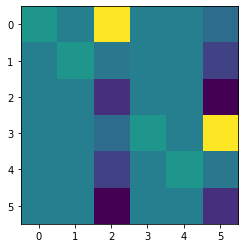

In [16]:

# Read the matrix A from the file
A = np.loadtxt('matrices3.txt', max_rows=6)

# Read the vector B from the file
b= np.loadtxt('matrices3.txt', skiprows=6)


if lb.symmetric(A):
    print("Matrix is symmetric")
else:
    print("Matrix is not symmetric")



# Define the initial guess
x0 = np.zeros_like(b)
# Set the tolerance and maximum number of iterations
tol = 1e-6

# Solve the system of equations using the Conjugate Gradient method
x = lb.cg(A, x0, b, 1000, tol)

# Print the solution
print("Solution using Conjugate Gradient method:", x)

#check using gauss-seidel method
x = lb.gauss_seidel_method(A, b)
print("Solution using Gauss-Seidel method:", x)

# Finding the inverse of a matrix using Conjugate Gradient method
n = len(b)
Ai = np.zeros((n,n))
for i in tqdm(range(n)):
    b = np.zeros(n)
    b[i] = 1
    x0 = np.ones(n)
    x = lb.cg(A, x0, b, 1000, 1e-6)
    Ai[i] = x
Ai = Ai.T
print(Ai)
plt.imshow(np.dot(A,Ai))

# Ques 4

100%|██████████| 50/50 [00:19<00:00,  2.54it/s]

[[-2.11578492 -2.06230706 -1.84384462 ... -1.5936755  -1.13901763
  -0.59323835]
 [-2.06230706 -3.95962955 -3.54018167 ... -3.05985695 -2.18691384
  -1.13901763]
 [-1.84384462 -3.54018167 -4.95330419 ... -4.28124985 -3.05985695
  -1.5936755 ]
 ...
 [-1.5936755  -3.05985695 -4.28124985 ... -4.95330419 -3.54018167
  -1.84384462]
 [-1.13901763 -2.18691384 -3.05985695 ... -3.54018167 -3.95962955
  -2.06230706]
 [-0.59323835 -1.13901763 -1.5936755  ... -1.84384462 -2.06230706
  -2.11578492]]


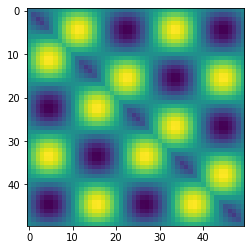

In [10]:
def mat(x, y):
    return (delta(x+1, y) + delta(x-1, y) - 2*delta(x, y))*0.5 + 0.04* delta(x, y)


n = 50
Ai = np.zeros((n,n))
r = np.zeros((50,50))
for i in tqdm(range(n)):
    b = np.zeros(n)
    b[i] = 1
    x0 = np.ones(n)
    x, res = lb.cg_4(x0, b, 1000, 1e-6)
    r[i][:len(res)] = res
    Ai[i] = x

print(Ai)
plt.imshow(Ai)


Plot of residue vs Iterations

In [13]:
import random
# generate random number between 0 to 49
random_number = random.randint(0, 49)
print("The step number displayed:",random_number)

The step number displayed: 17


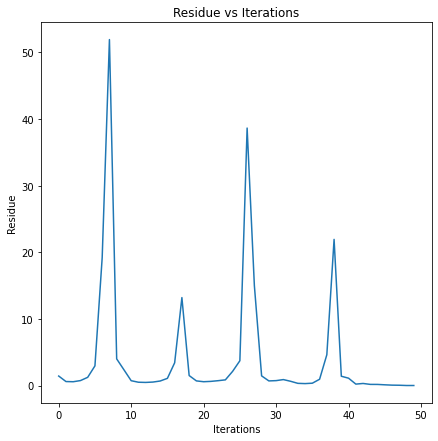

In [14]:
iter = np.arange(0, 50)

plt.figure(figsize=(7,7))
plt.plot(iter, r[random_number])
plt.xlabel('Iterations')
plt.ylabel('Residue')
plt.title('Residue vs Iterations')
plt.show()